In [1]:
import os

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.image import imread

In [3]:
pwd

'C:\\Users\\mahgodbo\\Documents\\pratice work\\3.1 FINAL_TF2_FILES.zip\\TF_2_Notebooks_and_Data\\04-CNNs'

In [5]:
path = 'C:\\Users\\mahgodbo\\Documents\\pratice work\\3.1 FINAL_TF2_FILES.zip\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\'

In [6]:
image = cv2.imread(path +'train\\parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png')

In [11]:
r,t,y=image.shape

In [12]:
r

163

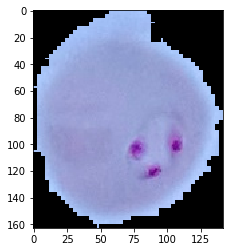

In [8]:
plt.imshow(image)

In [24]:
dim1 =[]
dim2 =[]
c=0
for file in os.listdir(path+'test\\parasitized'):
    img = imread(path+'test\\parasitized\\'+ file)
    d1 ,d2 ,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [13]:
os.listdir(path+'train\\parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [25]:
np.mean(dim1)

134.64307692307693

In [26]:
np.mean(dim2)

133.31846153846155

In [27]:
img_shape =(130,130,3)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
img_gen = ImageDataGenerator(rotation_range =20,
                            width_shift_range=0.10,
                            height_shift_range=.10,
                            rescale=1/255,
                            shear_range=.1
                            ,zoom_range=.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [31]:
batch_size =16

In [33]:
train_img_gen = img_gen.flow_from_directory(path+'train\\',
                                           target_size = img_shape[:2],
                                           color_mode ='rgb',
                                           batch_size = batch_size,
                                           class_mode='binary')


Found 24958 images belonging to 2 classes.


In [34]:
test_img_gen = img_gen.flow_from_directory(path+'test\\',
                                           target_size = img_shape[:2],
                                           color_mode ='rgb',
                                           batch_size = batch_size,
                                           class_mode='binary',
                                          shuffle=False)


Found 2600 images belonging to 2 classes.


In [35]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Dropout,Flatten

In [48]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = img_shape,activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))



model.add(Conv2D(filters = 64,kernel_size = (3,3),input_shape = img_shape,activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Conv2D(filters = 64,kernel_size = (3,3),input_shape = img_shape,activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metric=['accurarcy'])


In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
result = model.fit_generator(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[early_stop])

In [52]:
from tensorflow.keras.models import load_model

In [53]:
mod = load_model('malaria_detector.h5')

In [55]:
mod.metrics_names

['loss', 'accuracy']

In [57]:
mod.evaluate_generator(test_img_gen)

[0.14250667571472975, 0.9492308]

In [58]:
pre_prob =mod.predict_generator(test_img_gen)

In [59]:
prediction = pre_prob >0.5

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(test_img_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [64]:
print (confusion_matrix(test_img_gen.classes,prediction))

[[1220   80]
 [  45 1255]]


In [65]:
from tensorflow.keras.preprocessing import image

In [ ]:
n_image =image.load_img('link',target_size=image_shape)
n_image=image.img_to_array(my_image)
n_image=np.expand_dims(n_image,axis=0)
mod.predict(n_image)